![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# MCC implementation tests

In [178]:
#HIDDEN
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import os
import mtest
import tfel.math

In [179]:
import plot_settings
%run stress_path_defs.ipynb

In [180]:
%run plot_settings.py

In [181]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInitNLnu_abs.mfront'
#os.system(build_release)

In [182]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic SemiImplicitModifiedCamClayInc_OpenGeoSys2023.mfront'
#os.system(build_release)

In [183]:
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInitNLnu_inc.mfront'
#os.system(build_release)

In [184]:
nu = 0.25  # Poisson ratio
E = 50.0e6  # Young's modulus in Pa
la = 7.7e-2  # slope of the virgin consolidation line
ka = 6.6e-3  # slope of the swelling line
M = 1.2  # slope of the critical state line (CSL)
v0 = 1.788  # initial volume ratio
phi0 = 1 - 1 / v0  # Initial porosity
pc0 = 800.0e3  # Initial pre-consolidation pressure in Pa
pamb = 1.0  # Ambient pressure in Pa

times = np.linspace(0,1,1000)

In [185]:
#HIDDEN
#%run stress_path_defs.ipynb
#sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)
orig_OCR8 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [186]:
orig_OCR2 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [187]:
#%run stress_path_defs.ipynb
#build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInit.mfront'
#os.system(build_release)
OGS_OCR8 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [188]:
OGS_OCR2 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [189]:
OGS_NL_OCR8 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [190]:
OGS_NL_OCR2 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

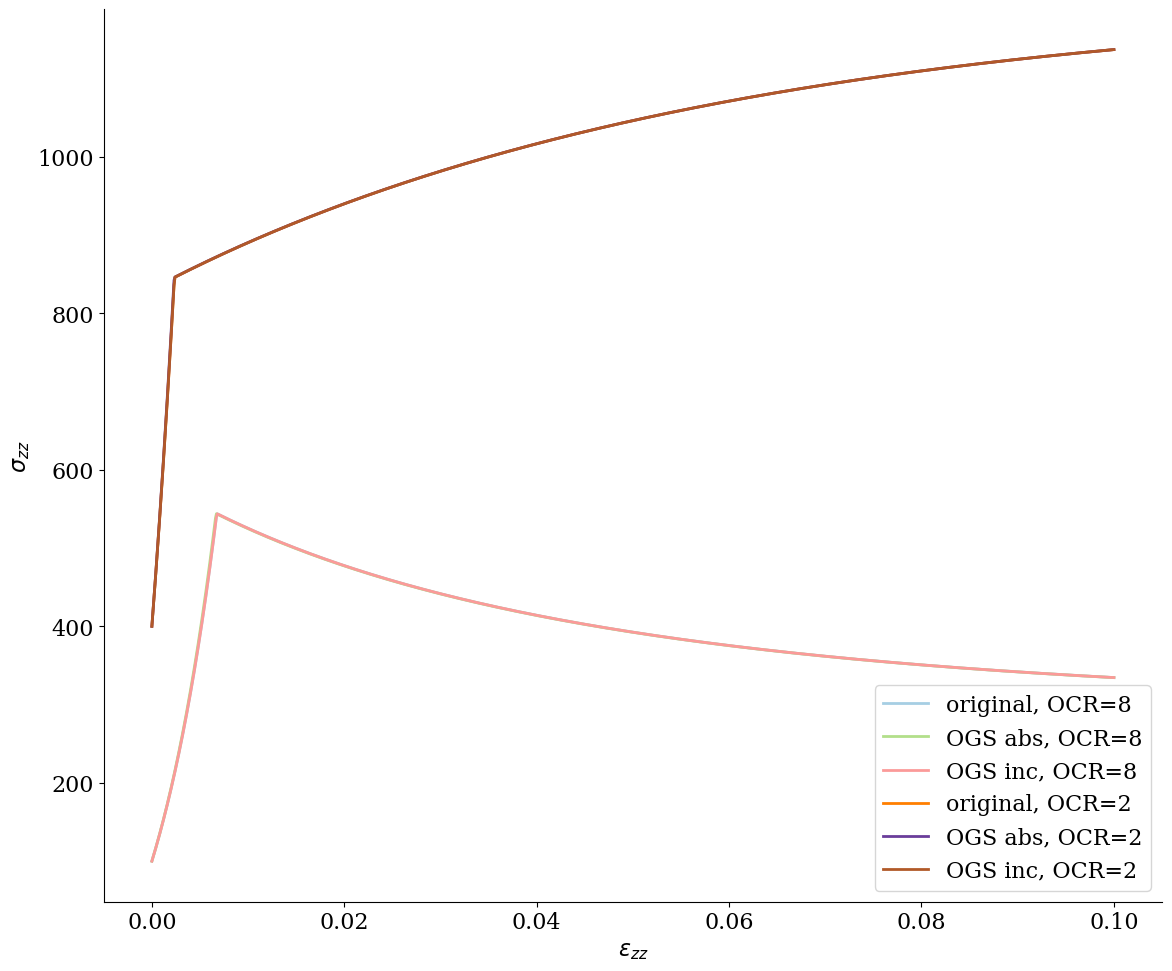

In [191]:
import matplotlib.cm as cm
# Get the paired colormap
cmap = cm.get_cmap('Paired')

# Get the list of colors from the colormap
colors = cmap(np.linspace(0, 1, 6))

fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS abs, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS inc, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS abs, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS inc, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$')
fig.tight_layout();

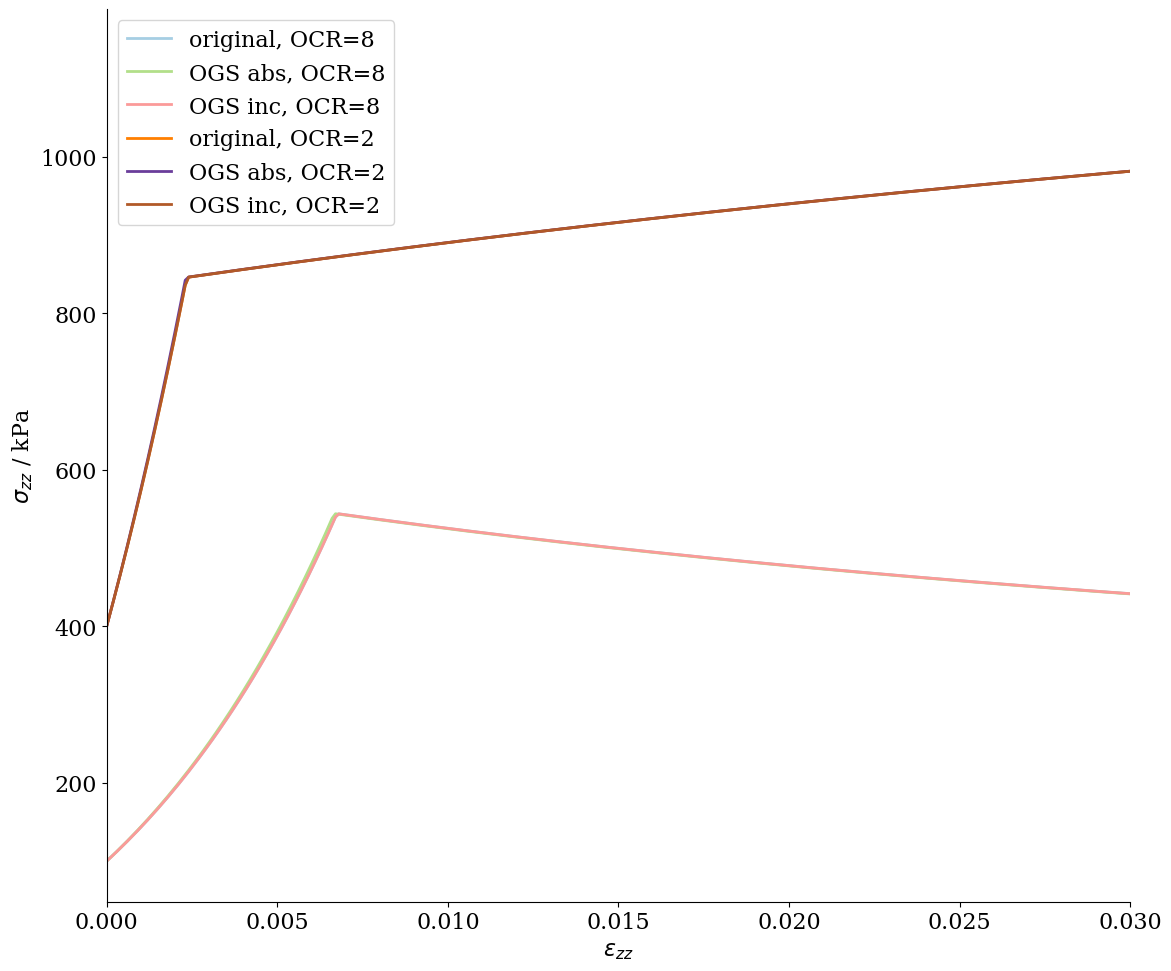

In [192]:
fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS abs, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS inc, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS abs, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS inc, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$ / kPa')
ax.set_xlim(0,0.03)
fig.tight_layout();

We don't see differences in the elastic part of the stress-strain curve. Yield stress and plastic flow are captured well by all models. Let's look at the volumetric behaviour:

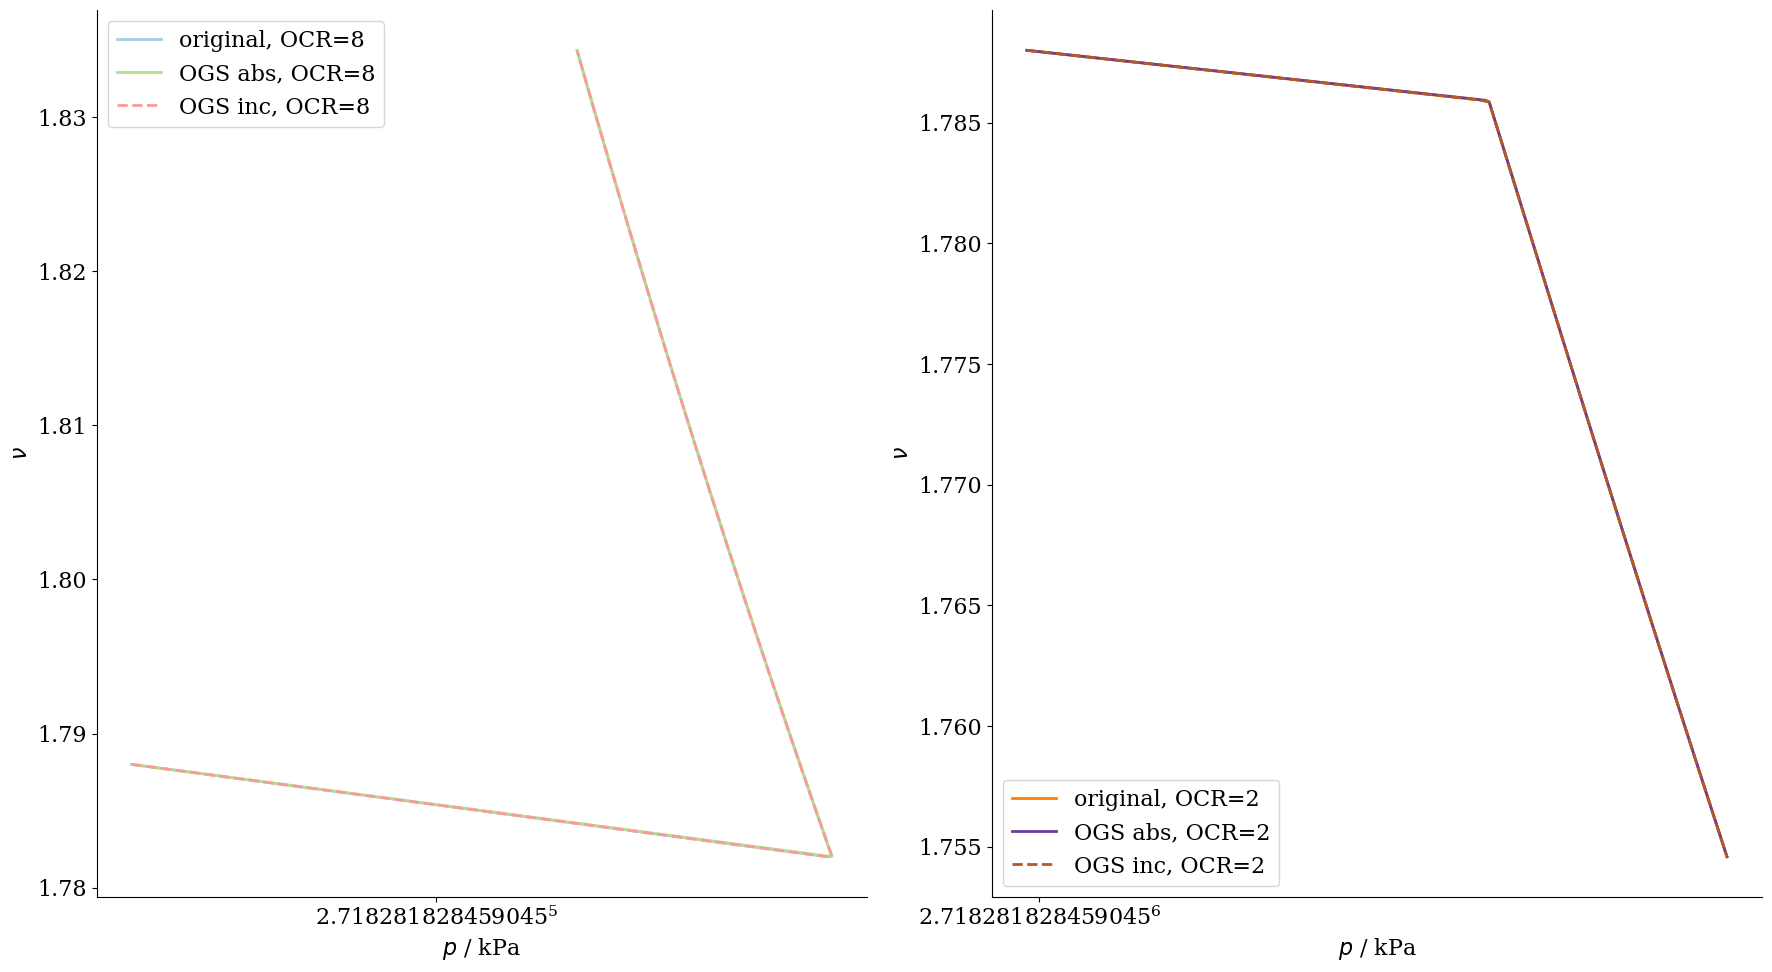

In [193]:
fig, ax = plt.subplots(figsize=(18,10),ncols=2)

# Set the color of each line using the colors from the colormap

ax[0].plot((orig_OCR8[0]+orig_OCR8[2]+orig_OCR8[4])/3e3, orig_OCR8[13], label='original, OCR=8', color=colors[0])
ax[0].plot((OGS_OCR8[0]+OGS_OCR8[2]+OGS_OCR8[4])/3e3, OGS_OCR8[13], label='OGS abs, OCR=8', color=colors[1])
ax[0].plot((OGS_NL_OCR8[0]+OGS_NL_OCR8[2]+OGS_NL_OCR8[4])/3e3, OGS_NL_OCR8[13], label='OGS inc, OCR=8', color=colors[2],ls='--')

ax[1].plot((orig_OCR2[0]+orig_OCR2[2]+orig_OCR2[4])/3e3, orig_OCR2[13], label='original, OCR=2', color=colors[3])
ax[1].plot((OGS_OCR2[0]+OGS_OCR2[2]+OGS_OCR2[4])/3e3, OGS_OCR2[13], label='OGS abs, OCR=2', color=colors[4])
ax[1].plot((OGS_NL_OCR2[0]+OGS_NL_OCR2[2]+OGS_NL_OCR2[4])/3e3, OGS_NL_OCR2[13], label='OGS inc, OCR=2', color=colors[5],ls='--')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('$p$ / kPa')
    ax[i].set_ylabel('$\\nu$')
    ax[i].set_xscale('log',base=np.e)
fig.tight_layout();

All non-linear models produce the desired $\lambda$, $\kappa$ behaviour and behave identically. To compare with the analytical result, let's perform an **isotropic compression test**.

In [194]:
OGS_NL_iso = MCC_iso_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)
OGS_NL2_iso = MCC_iso_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)
#%run stress_path_defs.ipynb
orig_iso = MCC_iso_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)

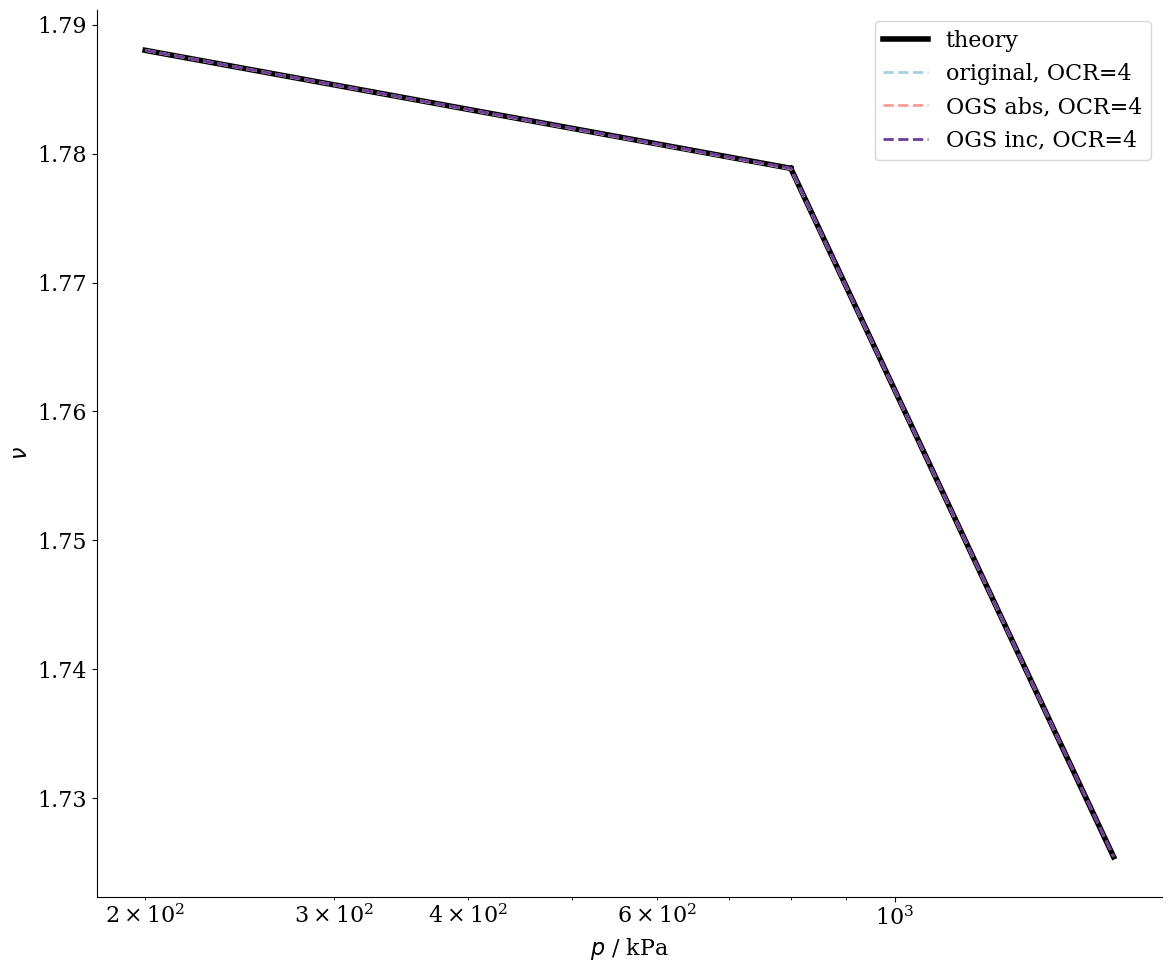

In [195]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot([pc0/1e3,2*pc0/1e3],
           [1/(1-phi0)-ka*np.log(pc0/(pc0/4)),1/(1-phi0)-ka*np.log(pc0/(pc0/4))-la*np.log(2*pc0/pc0)],
           color='black',lw=4,label='theory')
ax.plot([pc0/4e3,pc0/1e3],
           [1/(1-phi0),1/(1-phi0)-ka*np.log(pc0/(pc0/4))],
           color='black',lw=4)
ax.plot((orig_iso[0]+orig_iso[2]+orig_iso[4])/3e3, orig_iso[13], label='original, OCR=4', color=colors[0],ls='--')
ax.plot((OGS_NL2_iso[0]+OGS_NL2_iso[2]+OGS_NL2_iso[4])/3e3, OGS_NL2_iso[13], label='OGS abs, OCR=4', color=colors[2],ls='--')
ax.plot((OGS_NL_iso[0]+OGS_NL_iso[2]+OGS_NL_iso[4])/3e3, OGS_NL_iso[13], label='OGS inc, OCR=4', color=colors[4],ls='--')
ax.legend()
ax.set_xlabel('$p$ / kPa')
ax.set_ylabel('$\\nu$')
ax.set_xscale('log')#,base=np.e)
fig.tight_layout();

In [235]:
times = np.linspace(0,7,700)
%run stress_path_defs.ipynb

In [236]:
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, vr = MCC_triax_test_cyclic(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

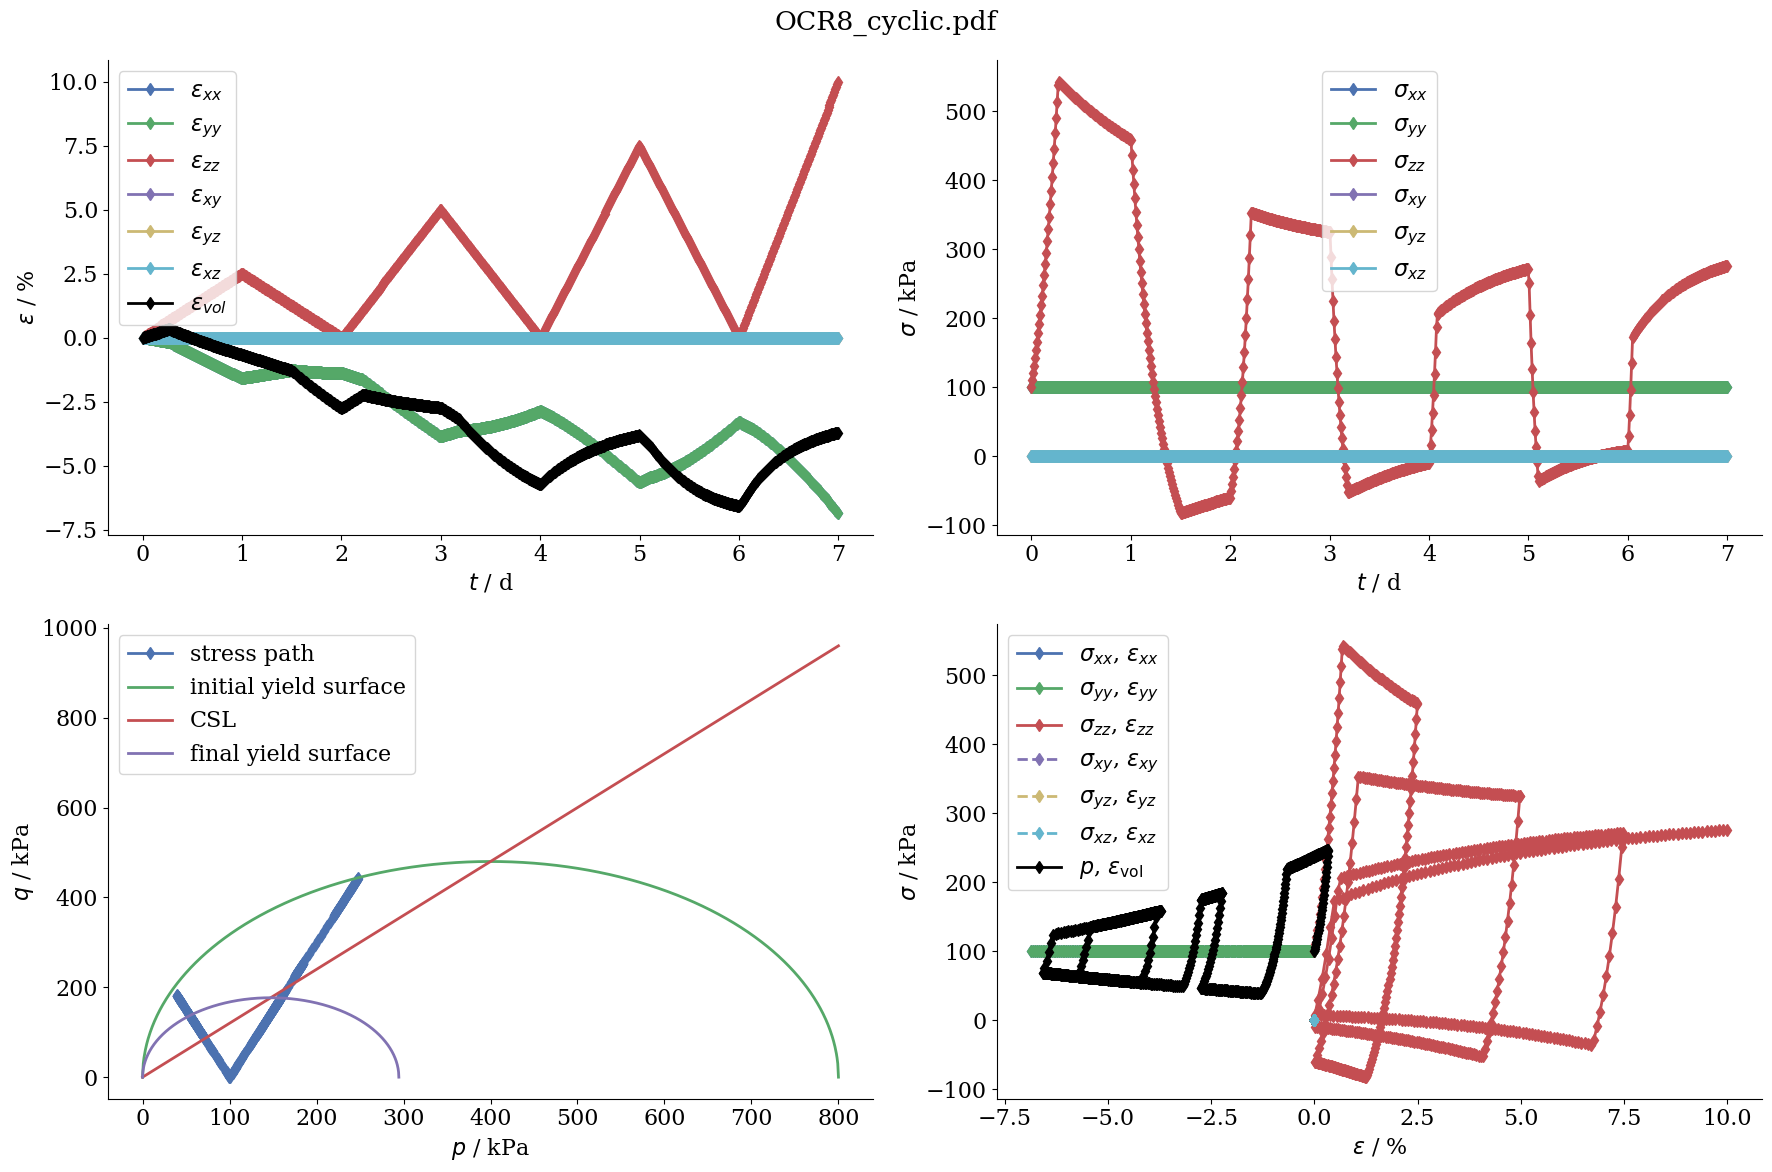

In [237]:
plot_results_MCC(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, vr,M,'OCR8_cyclic.pdf')

In [238]:
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, vr = MCC_triax_test_cyclic(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

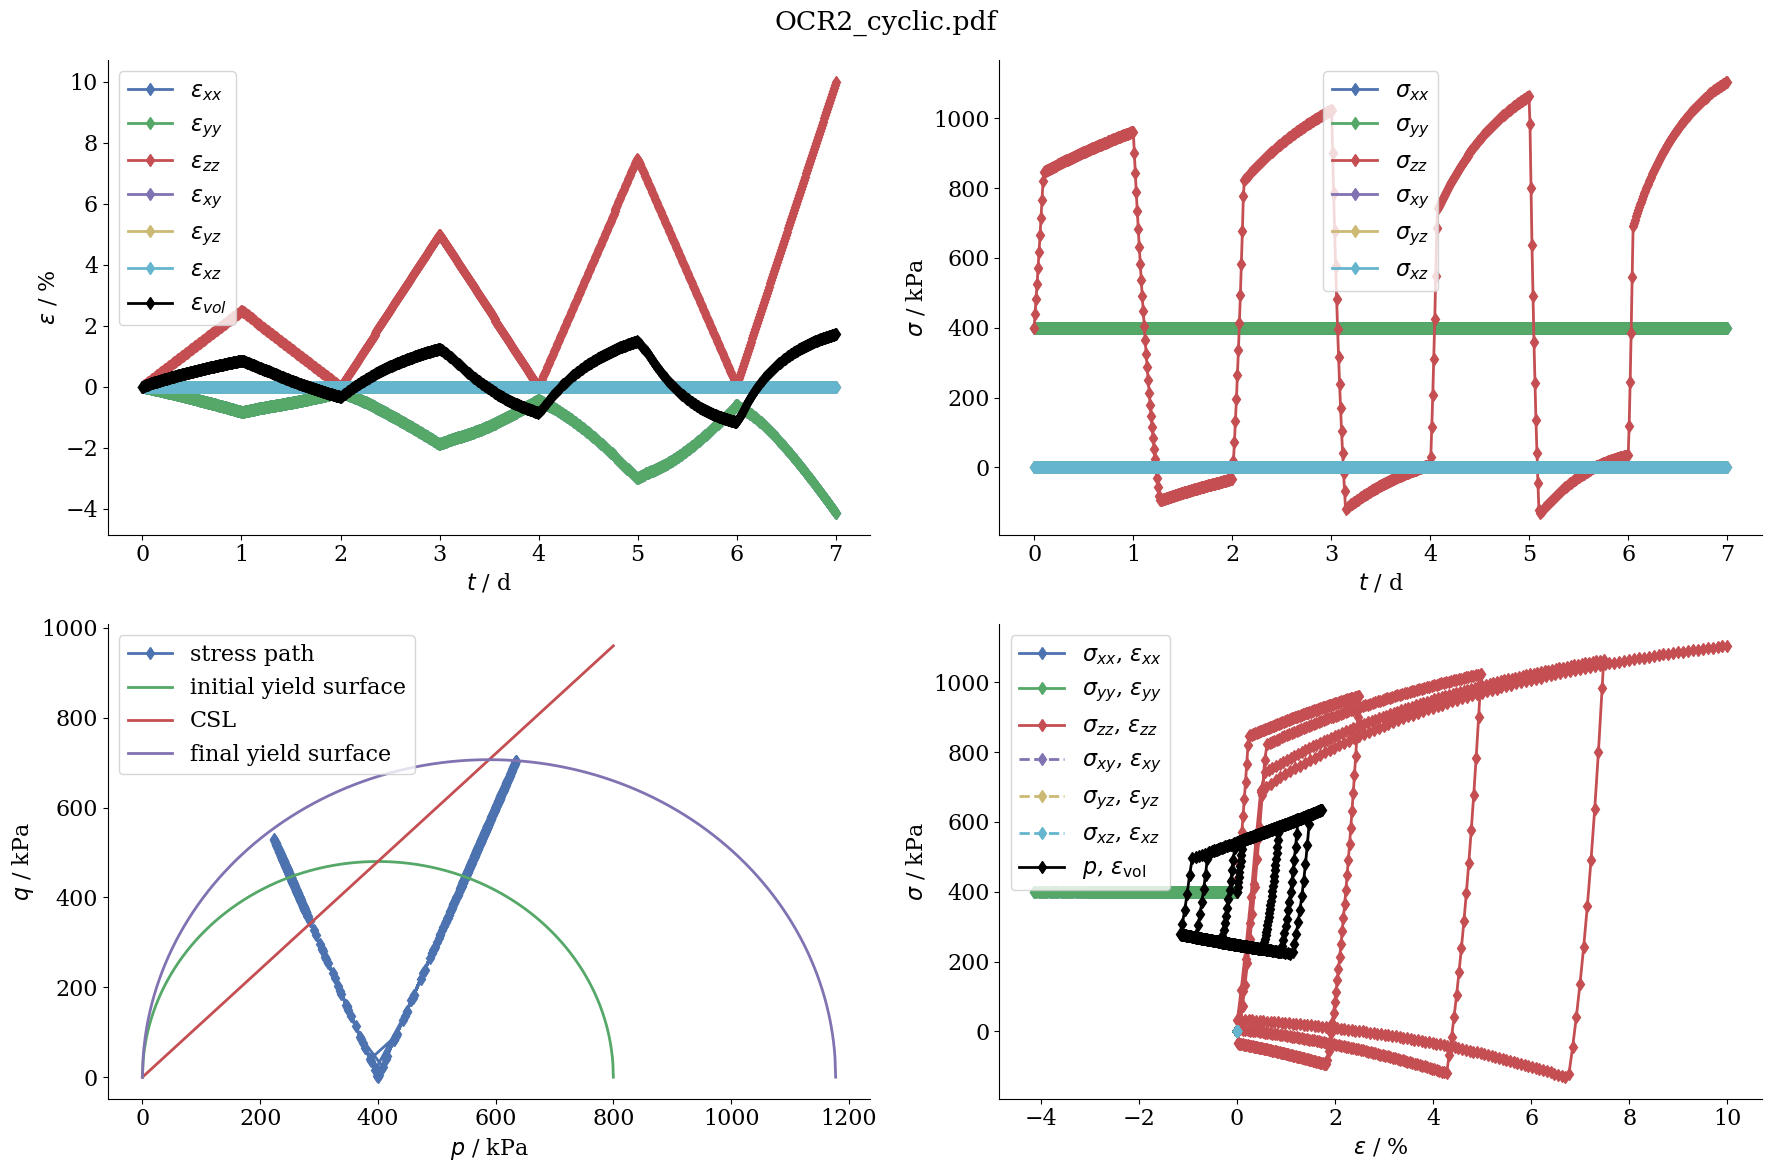

In [239]:
plot_results_MCC(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, vr,M,'OCR2_cyclic.pdf')